Exercise 6

4.1 Plot the potential of the harmonic oscillator
with some different values for the force constant k.

In [413]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [414]:
# constants
k_B = 1
T = 300
x_extrema = 100
x0 = 0 # positional displacement
x_min, x_max = -x_extrema, x_extrema  # Correctly set the range for x
x = np.linspace(x_min, x_max, 400)  # Generate 400 points from x_min to x_max
spring_constants = [0.5, 1, 2]
temperatures = [100, 300, 1000]


Define functions, V and P

In [415]:
# Potential energy function, V(x)
def V(x, k):
    return 0.5 * k * (x-x0)**2

# Probability distribution function, P(x)
def P(x, k, T):
    return np.sqrt(k / (2 * np.pi * k_B * T)) * np.exp(-0.5 * (k * x**2) / (k_B * T))  # prob density


Plots

[-100.          -99.49874687  -98.99749373  -98.4962406   -97.99498747
  -97.49373434  -96.9924812   -96.49122807  -95.98997494  -95.4887218
  -94.98746867  -94.48621554  -93.98496241  -93.48370927  -92.98245614
  -92.48120301  -91.97994987  -91.47869674  -90.97744361  -90.47619048
  -89.97493734  -89.47368421  -88.97243108  -88.47117794  -87.96992481
  -87.46867168  -86.96741855  -86.46616541  -85.96491228  -85.46365915
  -84.96240602  -84.46115288  -83.95989975  -83.45864662  -82.95739348
  -82.45614035  -81.95488722  -81.45363409  -80.95238095  -80.45112782
  -79.94987469  -79.44862155  -78.94736842  -78.44611529  -77.94486216
  -77.44360902  -76.94235589  -76.44110276  -75.93984962  -75.43859649
  -74.93734336  -74.43609023  -73.93483709  -73.43358396  -72.93233083
  -72.43107769  -71.92982456  -71.42857143  -70.9273183   -70.42606516
  -69.92481203  -69.4235589   -68.92230576  -68.42105263  -67.9197995
  -67.41854637  -66.91729323  -66.4160401   -65.91478697  -65.41353383
  -64.91

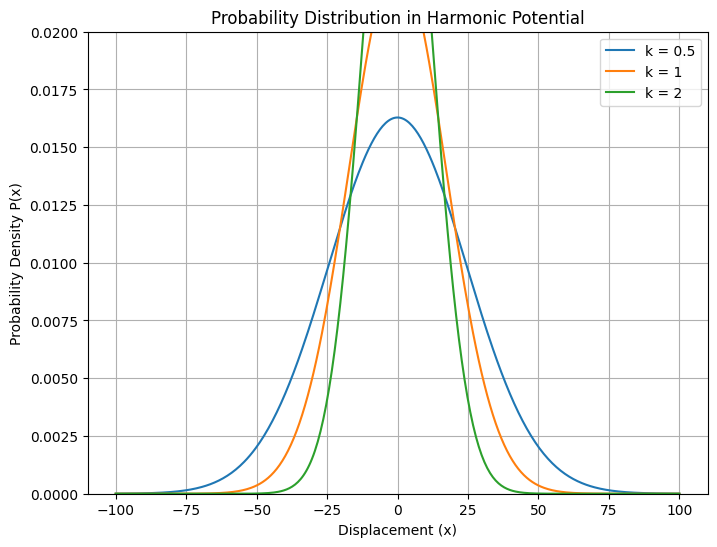

In [416]:
print(x)
plt.figure(figsize=(8, 6))
for k in spring_constants:
    plt.plot(x, P(x, k, T), label=f'k = {k}')

plt.xlabel('Displacement (x)')
plt.ylabel('Probability Density P(x)')
plt.title('Probability Distribution in Harmonic Potential')
plt.ylim((0, 0.02))
plt.grid(True)
plt.legend()
plt.savefig('classical_prob_dist_multiple_k.png')
plt.show()


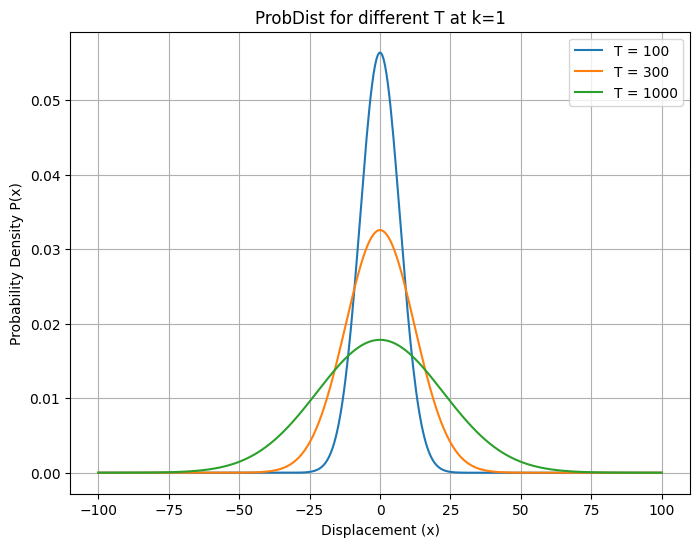

In [417]:
plt.figure(figsize=(8, 6))
for T in temperatures:
    plt.plot(x, P(x, k, T), label=f'T = {T}')

plt.xlabel('Displacement (x)')
plt.ylabel('Probability Density P(x)')
plt.title('ProbDist for different T at k=1')
# plt.ylim((0, 0.02))
plt.grid(True)
plt.legend()
plt.savefig('classical_prob_dist_multiple_k.png')
plt.show()

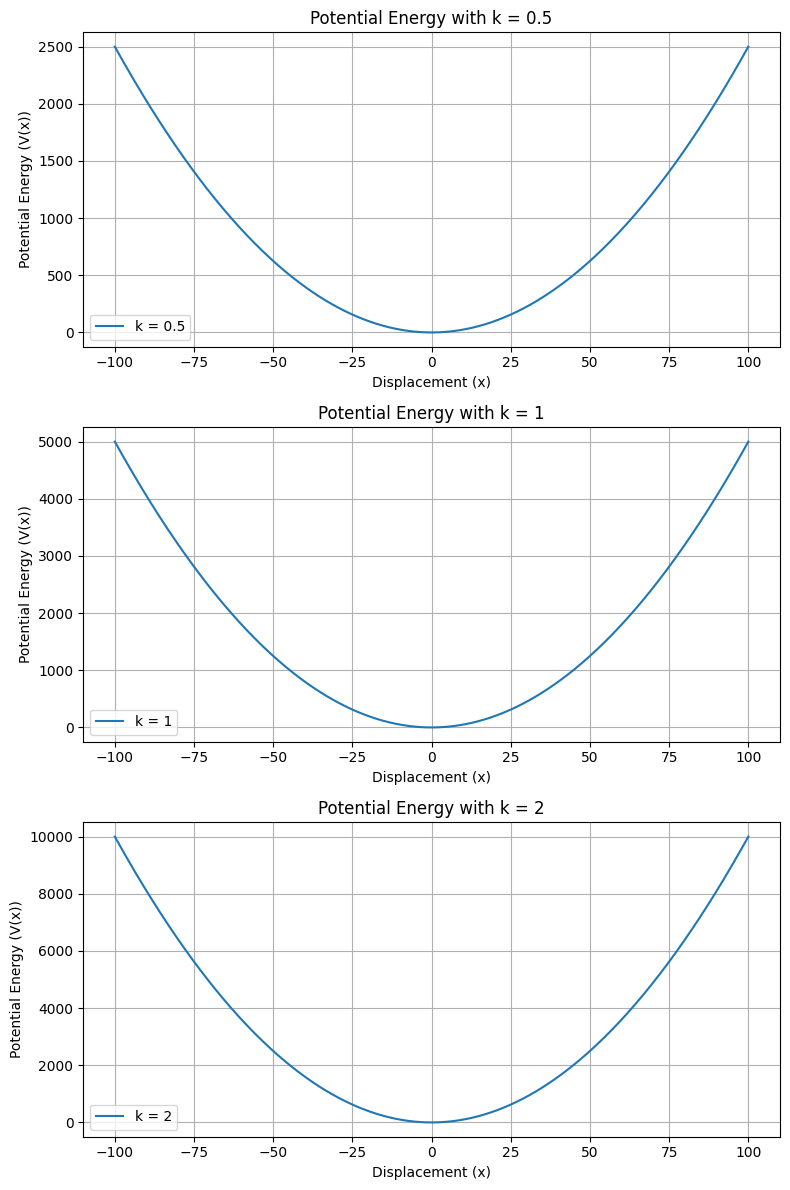

In [418]:
# Plot potential energies for different spring constants
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

for i, k in enumerate(spring_constants):
    V_values = V(x, k)
    axs[i].plot(x, V_values, label=f'k = {k}')
    axs[i].set_title(f'Potential Energy with k = {k}')
    axs[i].set_xlabel('Displacement (x)')
    axs[i].set_ylabel('Potential Energy (V(x))')
    axs[i].grid(True)
    # axs[i].set_xlim(x_range)
    # axs[i].set_ylim(y_range)
    axs[i].legend()

plt.tight_layout()
plt.savefig('HO_pot.png')
plt.show()


In [419]:
T = 300
# integrand for thermally averaged potential energy
def integrand(x):
    return V(x,k) * P(x,k,T)


# perform int
thermal_avg_V, _ = quad(integrand, x_min, x_max)

print(f"Thermally averaged potential energy at T=300K, k=1: {thermal_avg_V} J")

Thermally averaged potential energy at T=300K, k=1: 149.99999999999673 J


4.2 Direct Monte Carlo sampling
Evaluate the thermally avg pot energy by MC sampling.
Use a constant probability dist in a finite range as a known dist.

In [420]:
# direct Monte Carlo sampling using C = 0.1
def direct_MC_sampling(k,T,x_min,x_max,num_samples):
    accepted_samples = []
    total_samples = 0

    C = 0.1 #P(x_min,T) 
    print(f"C = {C}")

    while len(accepted_samples) < num_samples:
        x_i = np.random.uniform(x_min,x_max)
        RND = np.random.rand()
        total_samples += 1
        if RND <= P(x_i,k, T) / C:
            accepted_samples.append(x_i)
        rejection_rate = 1 - len(accepted_samples) / total_samples
        # print(f"Accepted samples: {len(accepted_samples)}")
        # print(f"Total samples: {total_samples}")
    print(f"Rejection Rate: {rejection_rate:.2%}")
    return np.array(accepted_samples)

In [421]:
x0 = 0.0
def direct_sampling(k,T,x_min,x_max,N=100000):
    xs = np.linspace(x_min, x_max, N)
    envelope = lambda x: np.exp(-0.5*k*(x-x0)**2/T)
    sample = [x for x in xs if np.random.rand() < envelope(x)]
    print('sample size:', len(sample))
    rejection_rate = 1 - len(sample) / len(xs)
    print(f"Rejection Rate: {rejection_rate:.2%}")
    return np.array(sample)

In [422]:
def estimate_thermal_avg_V(accepted_samples, k):
    V_values = V(accepted_samples, k)
    return np.mean(V_values)

In [423]:
num_samples = 100000
k = 1
T = 300

samples = direct_sampling(k,T,x_min,x_max,num_samples)
thermal_avg_V = estimate_thermal_avg_V(samples,k)
print(f"Estimated thermally avg pot energy: {thermal_avg_V} J")

sample size: 21782
Rejection Rate: 78.22%
Estimated thermally avg pot energy: 151.01145883013456 J


4.3 Heat cap of one harmonic osc by eval the thermally avg pot energy at some different temps and then taking the deriv numerically.

In [424]:
h = 1e-4
T_eval = 300
T = T_eval+h
V_plus, _ = quad(integrand, x_min, x_max)
T = T_eval-h
V_minus, _ = quad(integrand, x_min, x_max)
# V_plus = estimate_thermal_avg_V(samples,k)
# T = T_eval-h
# V_minus = estimate_thermal_avg_V(samples,k)

derivative = (V_plus - V_minus) / (2*h)
print(f'Heat capacity from numerical deriv of <V(x)>: {derivative}')

Heat capacity from numerical deriv of <V(x)>: 0.4999976451358634


In [425]:
def estimate_thermal_avg_V_sqrd(accepted_samples, k):
    V_values_sqrd = V(accepted_samples, k)**2
    return np.mean(V_values_sqrd)

4.4 Evaluate heat cap from fluctuations of potential energy, [<V(x)^2>-<V(x)>^2] / k_BT^2

In [427]:
T = 300
thermal_avg_V_sqrd = estimate_thermal_avg_V_sqrd(samples,k)
C_v = ( thermal_avg_V_sqrd - thermal_avg_V**2 ) / T**2
print(f"Heat cap from fluctuations: {C_v}")

Heat cap from fluctuations: 0.4933283754216973


Plot of C_v from energy and fluctuations as a function of T

In [ ]:
# make a plot like the graph in 4.3

Exercise 7

5.1 Two oscillators
a) consider two classical harmonic oscillators with k=1, x0=0 and k=10, x0=1, respectively. Plot the potentials.

TypeError: V() missing 1 required positional argument: 'x0'

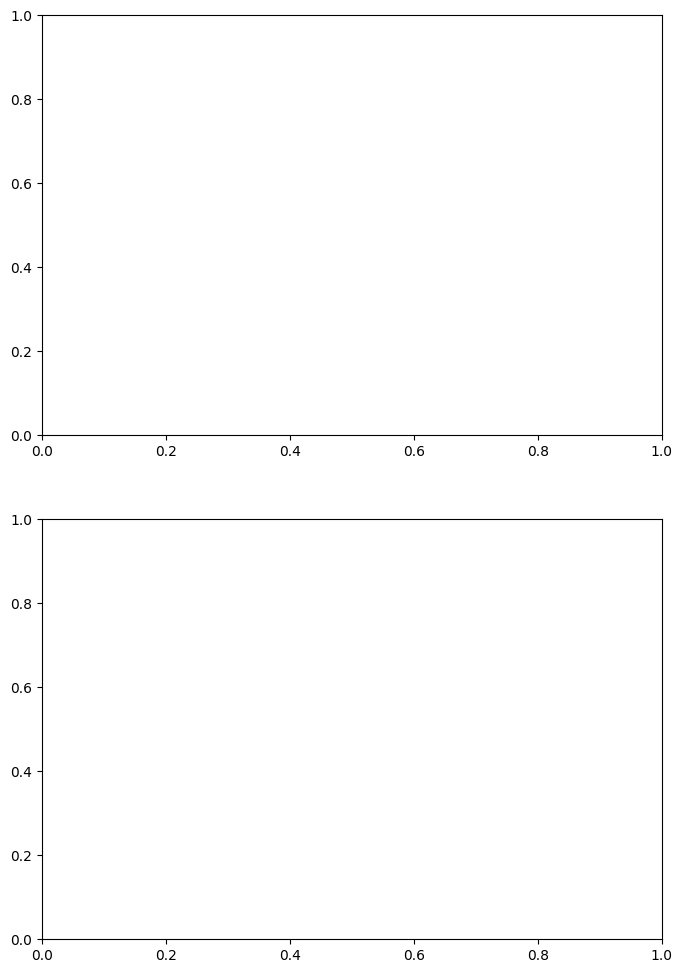

In [428]:
k_1 = 1
x0_1 = 0
k_2 = 10
x0_2 = 1

# Potential energy function, V(x)
def V(x, k, x0):
    return 0.5 * k * (x-x0)**2

V1 = V(x, k1, x0_1)
V2 = V(x, k2, x0_2)

plt.figure(figsize=(8, 6))
plt.plot(x, V1, label=f'k={k1}, x0={x0_1}')
plt.plot(x, V2, label=f'k={k2}, x0={x0_2}')

plt.xlabel('Displacement (x)')
plt.ylabel('Potential Energy V(x)')
plt.title('Potential Energy of Two Harmonic Oscillators')
plt.grid(True)
plt.legend()
plt.savefig('harmonic_oscillators.png')
plt.show()
